<a href="https://colab.research.google.com/github/nasiviramya/ultralytics-yolo-tutorials/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.7 MB/s eta 0:00:00


# LOADING AND TRAINING MODEL

In [3]:
from ultralytics import YOLO

modelx = YOLO("yolo11n.pt")

img = modelx("frame_013.jpg")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/frame_013.jpg: 384x640 2 persons, 1 cup, 48.0ms
Speed: 17.3ms preprocess, 48.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


# All the predictions made by the YOLO model for that image

In [4]:
img

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# model’s prediction

In [5]:
img[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 41.], device='cuda:0')
conf: tensor([0.8433, 0.4398, 0.2510], device='cuda:0')
data: tensor([[2.0607e+02, 1.3777e+02, 6.5012e+02, 5.4667e+02, 8.4325e-01, 0.0000e+00],
        [2.1772e+01, 3.1502e+02, 1.2311e+03, 7.1350e+02, 4.3979e-01, 0.0000e+00],
        [5.2632e+02, 4.9517e+02, 6.4646e+02, 5.8042e+02, 2.5095e-01, 4.1000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[ 428.0942,  342.2158,  444.0480,  408.9010],
        [ 626.4294,  514.2593, 1209.3143,  398.4802],
        [ 586.3934,  537.7925,  120.1420,   85.2520]], device='cuda:0')
xywhn: tensor([[0.3344, 0.4753, 0.3469, 0.5679],
        [0.4894, 0.7142, 0.9448, 0.5534],
        [0.4581, 0.7469, 0.0939, 0.1184]], device='cuda:0')
xyxy: tensor([[ 206.0702,  137.7653,  650.1182,  546.6663],
        [  21.7722,  315.0192, 1231.0865,  713.4995],
        [ 526.3224,  495.1665,  646.4644,  5

# Visualisation of the model

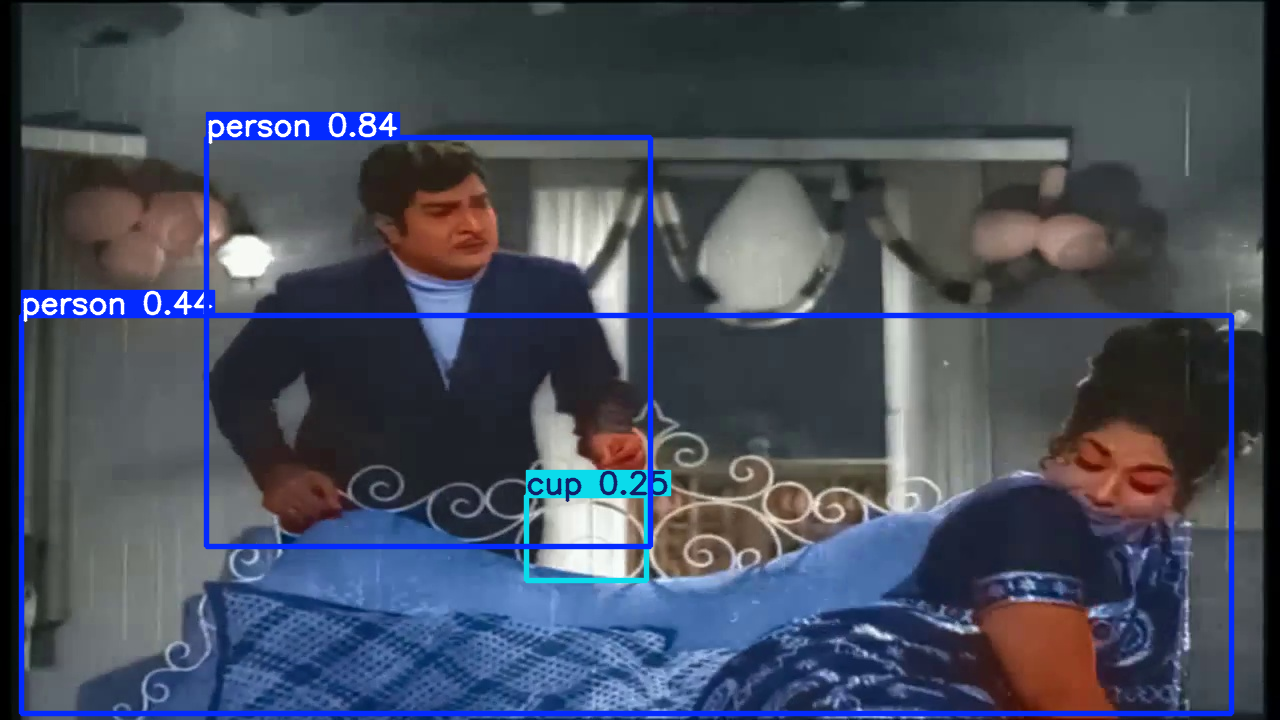

True

In [6]:

# Get the image with predictions drawn
result = img[0].plot()  # returns an image array (BGR)

# Display using cv2_imshow in Colab
cv2_imshow(result)

# Optional: save the plotted image
cv2.imwrite("frame_013_predicted.jpg", result)


# MODEL : **yolo11x**


image 1/1 /content/frame_013.jpg: 384x640 3 persons, 99.6ms
Speed: 2.0ms preprocess, 99.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


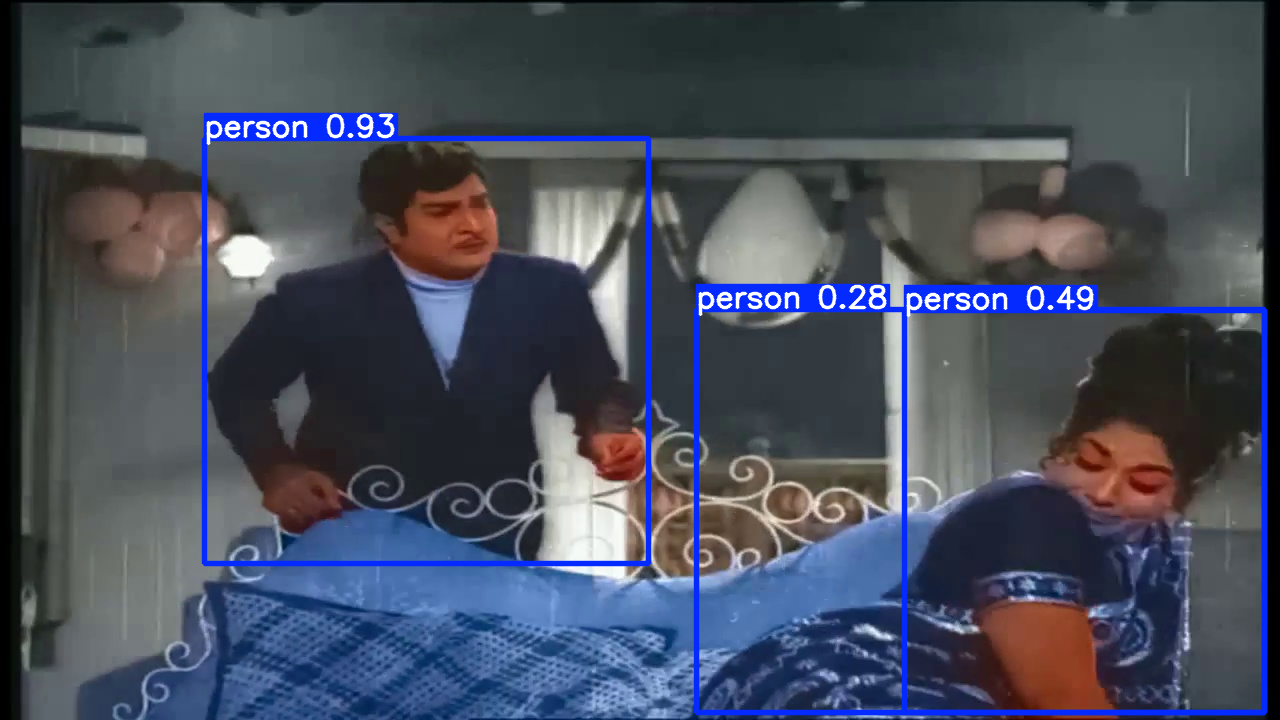

True

In [7]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the model
modelx = YOLO("yolo11x.pt")

# Run inference
results = modelx("frame_013.jpg")

# Get the image with predictions drawn
result_img = results[0].plot()  # returns an image array (BGR)

# Display using cv2_imshow in Colab
cv2_imshow(result_img)

# Optional: save the plotted image
cv2.imwrite("frame_013_predicted.jpg", result_img)


# custom_yolo_plot for object detection blue box , label and white text


image 1/1 /content/frame_013.jpg: 384x640 3 persons, 53.8ms
Speed: 1.9ms preprocess, 53.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


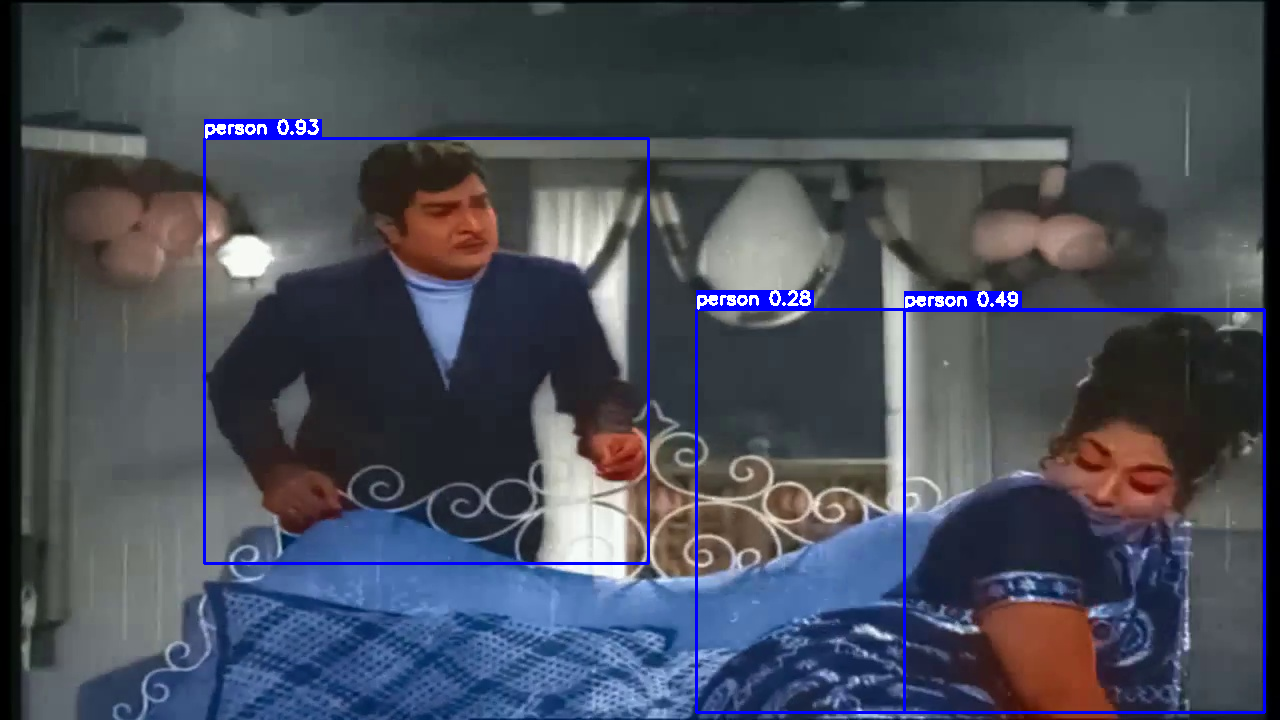

True

In [8]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load your model
modelx = YOLO("yolo11x.pt")

# Run inference
results = modelx("frame_013.jpg")
result = results[0]  # first image

# Copy the original image to draw on
img_vis = result.orig_img.copy()

# Blue color in BGR
blue = (255, 0, 0)

# Loop through each predicted box
for i, box in enumerate(result.boxes.xyxy):
    x1, y1, x2, y2 = box.int().tolist()
    cls_id = int(result.boxes.cls[i])
    conf = float(result.boxes.conf[i])
    cls_name = result.names[cls_id]

    label = f"{cls_name} {conf:.2f}"

    # Draw blue rectangle
    cv2.rectangle(img_vis, (x1, y1), (x2, y2), color=blue, thickness=2)

    # Get text size with thicker font (for background rectangle)
    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)

    # Draw filled rectangle for label background
    cv2.rectangle(img_vis, (x1, y1 - h - 5), (x1 + w, y1), color=blue, thickness=-1)

    # Put white text with thicker font
    cv2.putText(img_vis, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Display the custom plotted image
cv2_imshow(img_vis)

# Optional: save the image
cv2.imwrite("frame_013_custom_blue_thick_text.jpg", img_vis)


# OBJECT DETECTION FOR **VIDEOS**

Using device: cuda

0: 384x640 2 persons, 63.1ms
Speed: 1.6ms preprocess, 63.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


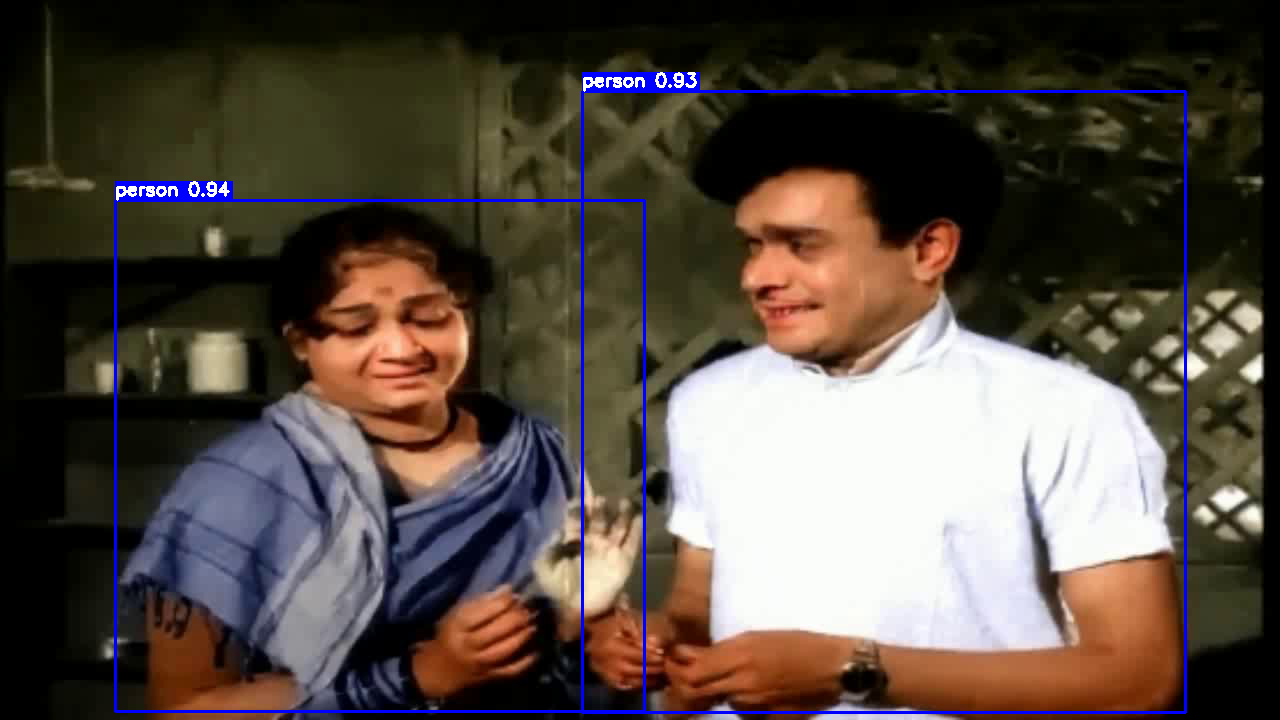


0: 384x640 4 persons, 1 cell phone, 32.9ms
Speed: 2.9ms preprocess, 32.9ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 32.8ms
Speed: 2.4ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 30.9ms
Speed: 1.8ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


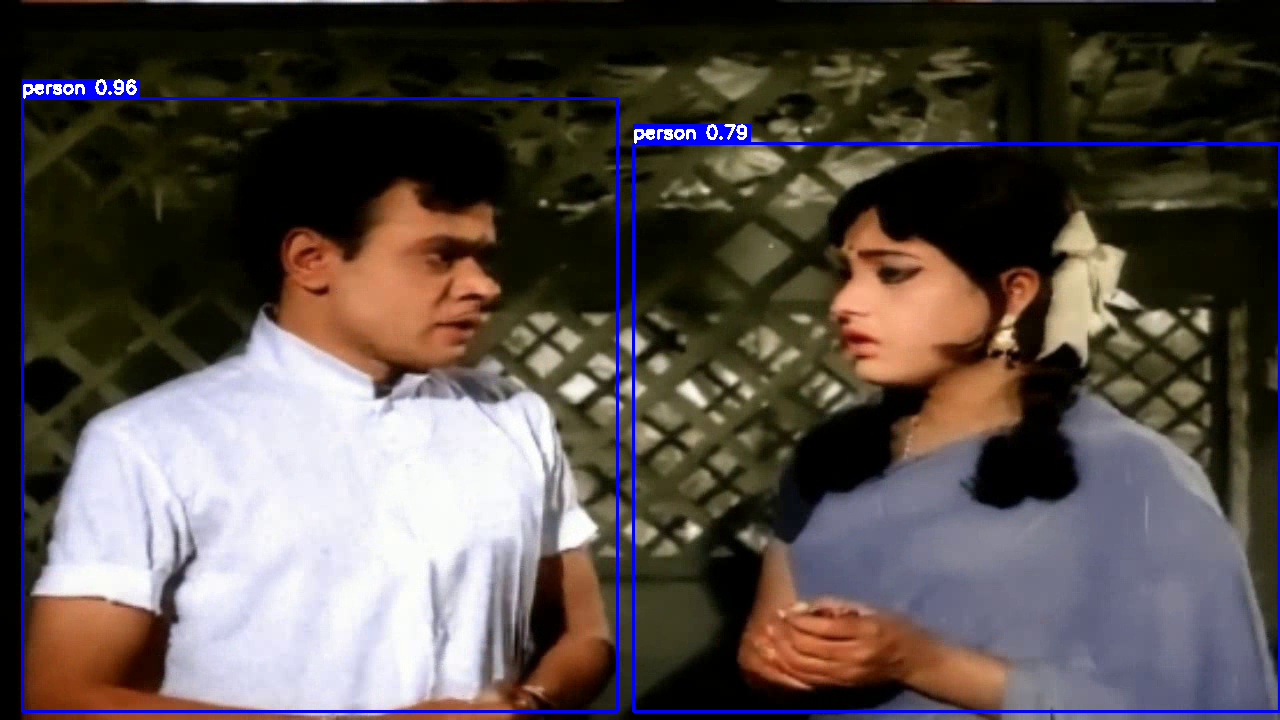


0: 384x640 2 persons, 28.6ms
Speed: 3.9ms preprocess, 28.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 29.3ms
Speed: 3.0ms preprocess, 29.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 31.3ms
Speed: 2.6ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 30.9ms
Speed: 2.1ms preprocess, 30.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 30.7ms
Speed: 3.6ms preprocess, 30.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


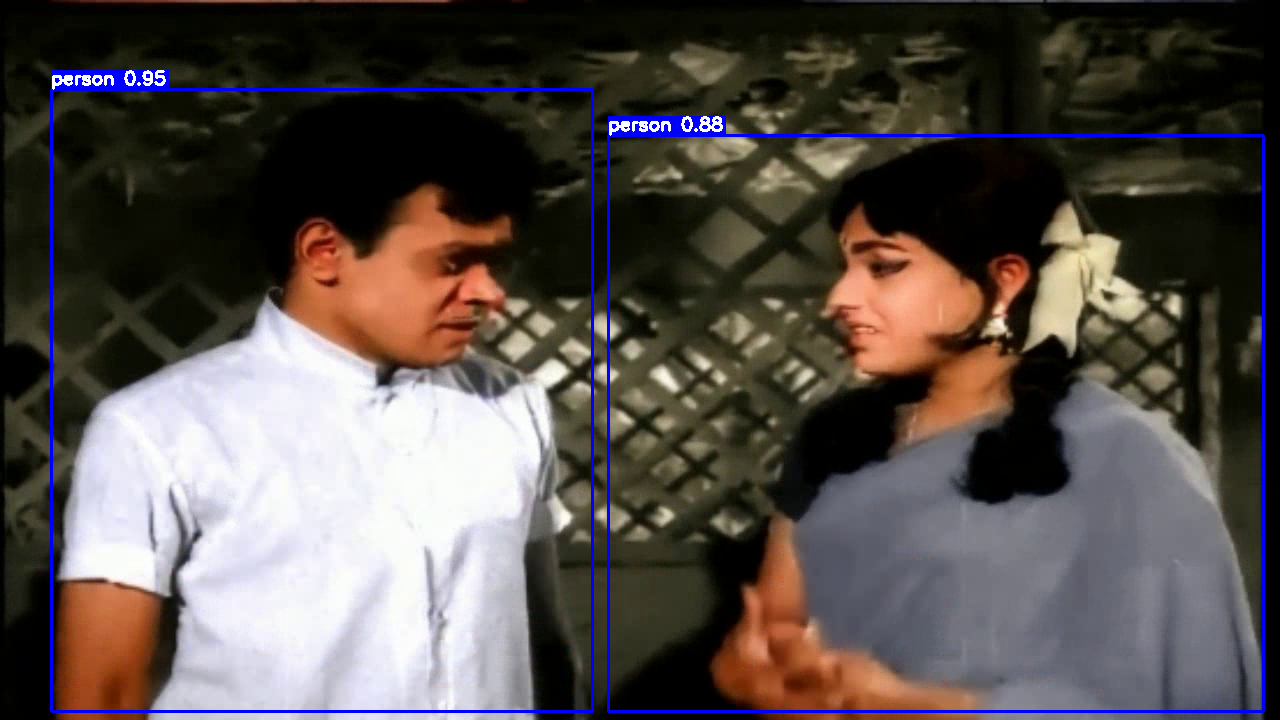


0: 384x640 2 persons, 34.6ms
Speed: 4.2ms preprocess, 34.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 29.3ms
Speed: 2.9ms preprocess, 29.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 29.6ms
Speed: 2.4ms preprocess, 29.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 29.8ms
Speed: 5.0ms preprocess, 29.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 29.5ms
Speed: 3.8ms preprocess, 29.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


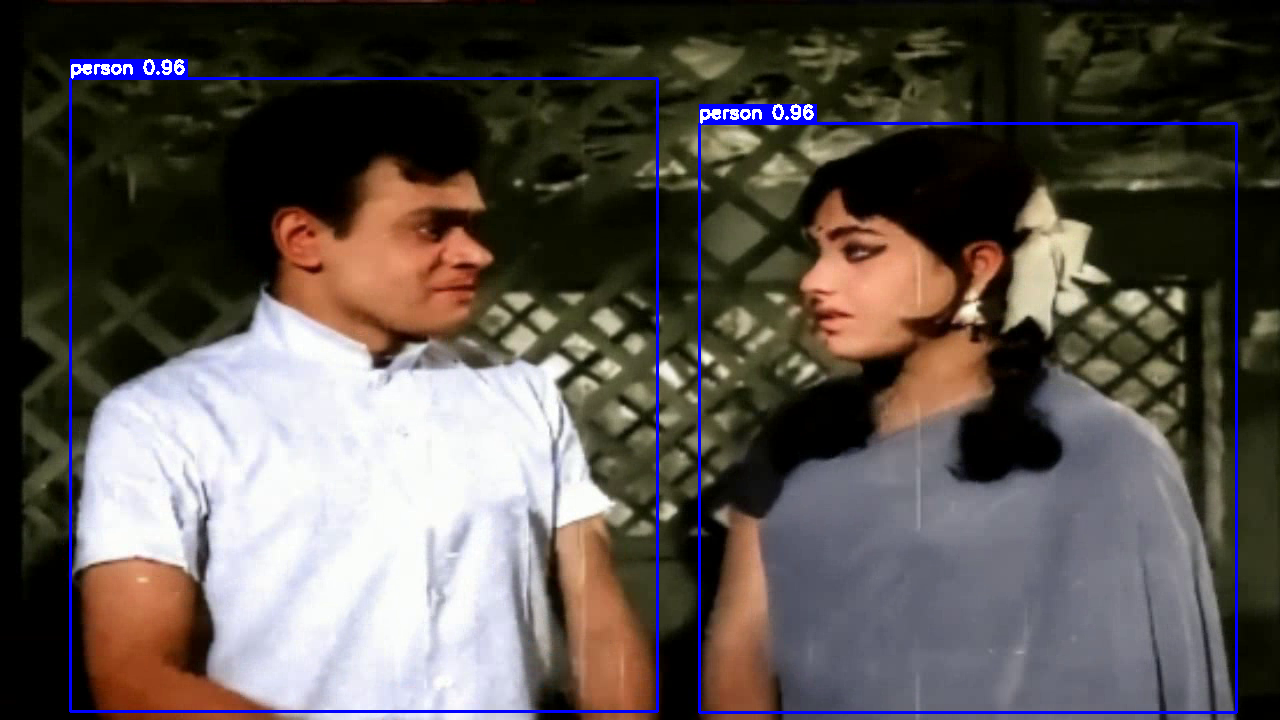


0: 384x640 3 persons, 1 tie, 1 chair, 28.8ms
Speed: 4.2ms preprocess, 28.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tie, 3 chairs, 30.9ms
Speed: 1.8ms preprocess, 30.9ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tie, 3 chairs, 31.4ms
Speed: 1.7ms preprocess, 31.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 tie, 1 chair, 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 tie, 1 chair, 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


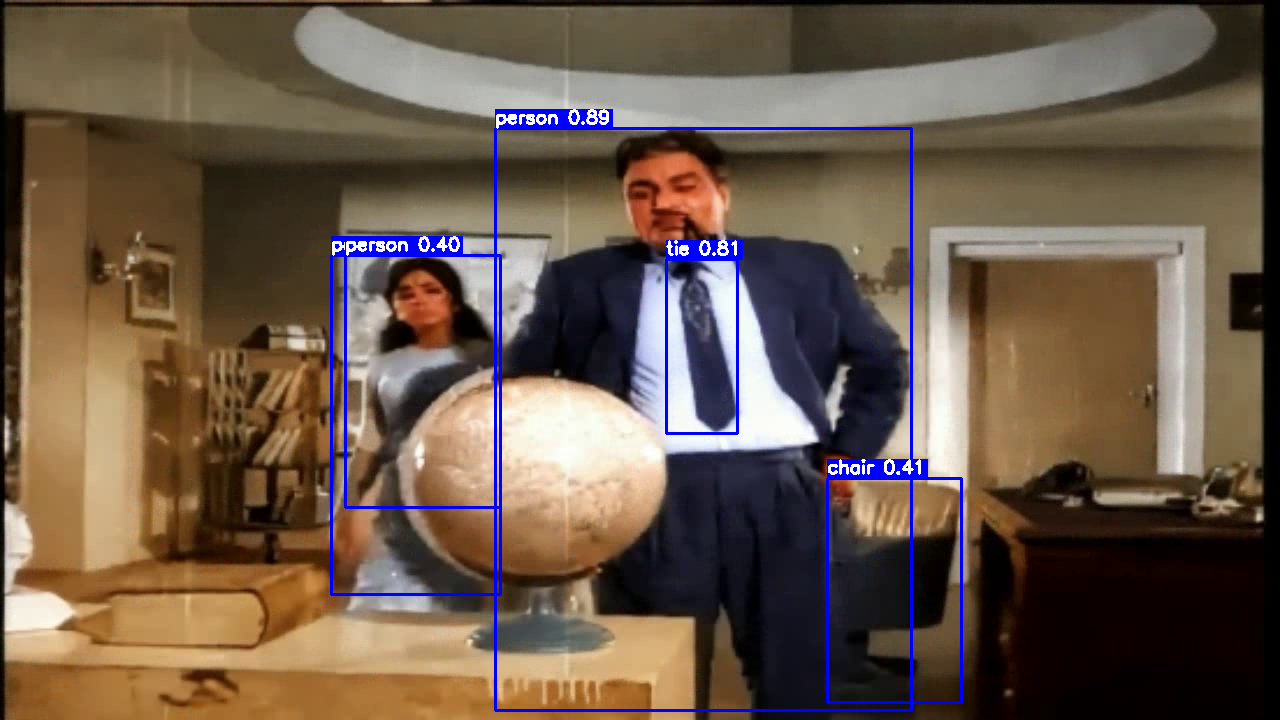


0: 384x640 2 persons, 31.7ms
Speed: 6.3ms preprocess, 31.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tie, 1 chair, 29.6ms
Speed: 2.0ms preprocess, 29.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 chair, 29.8ms
Speed: 3.2ms preprocess, 29.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tie, 1 chair, 30.6ms
Speed: 4.0ms preprocess, 30.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 tie, 1 chair, 31.2ms
Speed: 1.8ms preprocess, 31.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


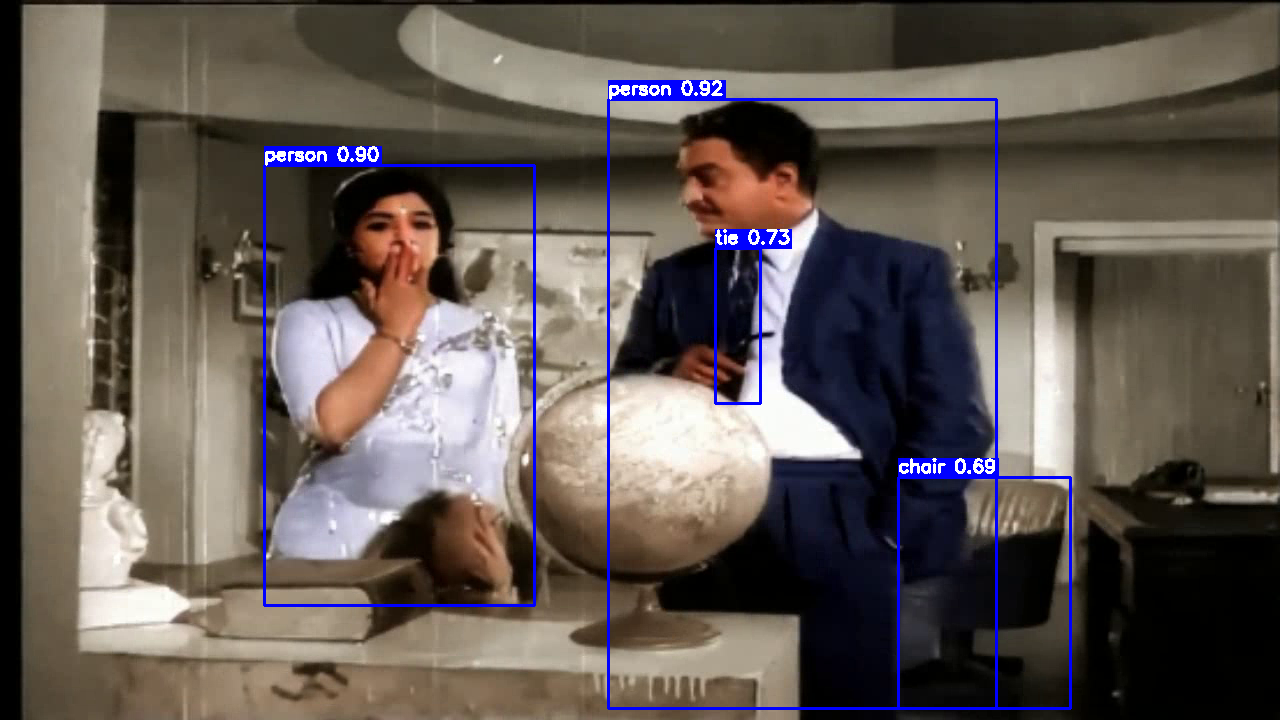

Processed video saved to output_video_cuda.mp4


In [10]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import torch
import time

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load your model and send to GPU
modelx = YOLO("yolo11x.pt")
modelx.to(device)

# Input and output video paths
video_path = "input_1.mp4"
output_path = "output_video_cuda.mp4"

# Open video
cap = cv2.VideoCapture(video_path)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# Video writer to save processed video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Blue color for boxes
blue = (255, 0, 0)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO inference on GPU
    results = modelx(frame, device=device)
    result = results[0]

    # Copy frame to draw on
    img_vis = frame.copy()

    # Draw boxes and labels
    for i, box in enumerate(result.boxes.xyxy):
        x1, y1, x2, y2 = box.int().tolist()
        cls_id = int(result.boxes.cls[i])
        conf = float(result.boxes.conf[i])
        cls_name = result.names[cls_id]

        label = f"{cls_name} {conf:.2f}"

        # Draw rectangle
        cv2.rectangle(img_vis, (x1, y1), (x2, y2), color=blue, thickness=2)

        # Text size for background
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(img_vis, (x1, y1 - h - 5), (x1 + w, y1), color=blue, thickness=-1)

        # Put white text
        cv2.putText(img_vis, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Write frame to output video
    out.write(img_vis)

    # Display frame inline in Colab (every 5 frames to save resources)
    if frame_count % 5 == 0:
        cv2_imshow(img_vis)
        time.sleep(0.05)  # small delay to make display readable

    frame_count += 1

# Release resources
cap.release()
out.release()
print(f"Processed video saved to {output_path}")
